● 라이브러리 불러오기 및 모디 모듈 로드

In [1]:
import cv2
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
import modi
from IPython.display import clear_output, display
import time

bundle = modi.MODI(ai_mode=True)
mot = bundle.motors[0]
btn = bundle.buttons[0]

Running PyMODI (v1.0.1)
Initiating can connection...
Start initializing connected MODI modules
Button (4087) has been connected!
Motor (2924) has been connected!
Motor (2924) is not up to date. Please update the module by calling modi.update_module_firmware
MODI modules are initialized!
MODI AI modules are initialized!


● Class 종류 정의 
 - 분류하고자 하는 클레스를 이곳에서 정의합니다.  (ex: 초록불, 빨간불)

In [2]:
classes = ['traffic_green','traffic_red']

● 학습한 모델 불러오기 및 구성
 - 이곳에서 기존에 학습한 모델을 load 하여 모델을 시작합니다. 

In [3]:
model = tensorflow.keras.models.load_model('./model/model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


● 입력할 데이터 형태를 정의합니다.
 - 예제에서는 이미지의 형태가 입력 데이터 형태가 됩니다. (ex : 32 x 24 pixel) 

In [4]:
width = 32
height = 24
dim = (width, height)

data = np.ndarray(shape=(1, height, width, 3), dtype=np.float32) # 데이터를 특정 형태의 numpy array type으로 만듭니다.

● 카메라 모듈 불러우기
 - 사용될 카메라 모듈을 불러옵니다. 

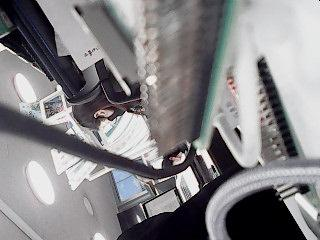

ready
cam True


In [5]:
cam = bundle.ai_cameras[0]
cam.set_window()

print('ready')
print('cam',cam.is_opened())

● 메인 반복 함수 활성화
 - 카메라 모듈이 작동하는 동안 함수가 유지되는 함수입니다. 

In [ ]:
while cam.is_opened():
    frame = cam.read()
    
    # frame 자료 이미지 변환
    image = Image.fromarray(frame)

    # 1차 이미지 사이즈 
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)

    # Numpy array 데이터 형태로 변환
    image_array = np.asarray(image)

    # 이미지 정규화 작업
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    
    # 영상을 라지베리파이가 처리가능하게 32 x 24 크기로 축소하여 리사이징
    resized = cv2.resize(normalized_image_array, dim, interpolation = cv2.INTER_AREA)
    # Load the image into the array
    data[0] = resized

    print('resized', data[0].shape ,end='\r')

    # 모델에 영상데이터를 넣어 예측하는 부분. 
    pred = model.predict_classes(data)

    pred_class = classes[pred[0]]

    print("Predicted Class : ", pred_class , end='\r')
    cam.show(frame)
    

    if pred_class == 'traffic_green':
        mot.speed = -40, 40
    elif pred_class == 'traffic_red':
        mot.speed = 0, 0

    if btn.clicked:
        
        
    
        mot.speed = 0,0
        # self.camera.release()
        cv2.destroyAllWindows()
        break

    if cv2.waitKey(1) & 0xFF == ord('q'):
        mot.speed = 0,0
        cam.release()
        cv2.destroyAllWindows()
        break
        
    